# Machine learning introduction

## Set up the environment

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

## Machine Learning in a nutshell

Any Machine Learning (ML) model makes an attempt to construct a function from
the `n` dimensional input space (`features`) to the ``m`` dimensional output space (`targets` or `labels`):

$$\Huge{
R^{n} \rightarrow R^{m}
}
$$

Basing on the output data there are four main flavours of ML models:

* according to the type of the output space:
    * **regression** - the output space is the ussual $R^{m}$
    * **categorisation** - the output space is a discrete set of possibilities - ``categories``. The model is expected to provide probability that example ``x`` belongs to class ``y``.  
* according to the avalaibility of the data in the output space - ``labels``:
    * **supervised learning** - a full set of input: ``X``, and output: ``Y`` values is available: ``data=(X,Y)``
    * **unsupervised learing** - only the input data: ``X`` is avalable. ``Y`` values are usually unknown: ``data=(X)``

Here capital X, Y denote a set of feature, or label values. A single ``example`` from the full dataset will be denoted with small letterrs: 

$$
\huge{
(x,y) \in (X,Y)
}
$$

The $X \rightarrow Y$  correspondence is ussually not deterministic (mostly due to lack of our knowlwdge, e,g, ``X`` does not cover all the variables controlling the ``Y`` value) the ML models provide some probabilistic estimates, like expectation value:

$$
\huge{
   f(x) = \int_{Y} y \cdot p(x,y) dy = <y(x)>
}
$$
where $p(x,y)$ is a joint probability ditribution for (x,y) pair.

## Linear model - an archetypic ML model.

We will play with a simple, therefore easy to understand linear model:

$$
\huge{
x = (x_{1}, ...,x_{m}), y = (y) \\
f(x) = \theta_{0} + \theta_{i} \cdot x_{i}
}
$$

This example will allow us to introduce basic ML concepts of `loss function` and `gradient descent`.
We will also learn basic programming techniques using numpy arrays parallel manipulations.

We will use a rank 1 ```x``` and ```y``` arrays: a single dimensional case. 

First we generate the data:

1) draw a random set X
2) draw a random set Y (y values for every x value). The Y will have a random noise ($\mathbf{\epsilon}$), around the ideal case (equal `0` for a moment):
$$
$$
$$
\huge{
y = \theta_{0} + \theta_{1} \cdot x + \epsilon \\
}
$$
3) define a linear model:
$$
\huge{
f(x) = \theta_{0} + \theta_{1} \cdot x
}
$$
4) perform a ``training``

5) estimate the model performance

### Generate the X set

Here the ``X`` is just a set of random values in one dimention. This means we have one feature, `n=1`, and `nPoints` examples.

In [2]:
%time

minX = 0
maxX = 1
nPoints = 5
x_raw = np.random.default_rng().uniform(minX, maxX, nPoints)

print(colored("Shape of the X array:","blue"),x_raw.shape)

#it will be convenient to represent X as a an array: nPoints rows, one column
x_raw = np.reshape(x_raw, (-1,1))
print(colored("Shape of the X array:","blue"),x_raw.shape)
print(colored("First few examples:\n","blue"),x_raw[:10])

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
Shape of the X array: (5,)
Shape of the X array: (5, 1)
First few examples:
 [[0.79574071]
 [0.63522388]
 [0.27912708]
 [0.0767867 ]
 [0.75796286]]


### Generate Y according to given formula, without any noise:

$$
\huge{
y = \theta_{0} + \theta_{1} \cdot x 
}
$$

In [3]:
#define coefficients as a array
theta = (1,3)

# calculate the y values
y = theta[0] + theta[1]*x_raw
print(colored("First few Y values:\n","blue"), y[:10])

# calculate the y values using a more compact formula
# substitute each X value by a pair (1,X):
ones = np.ones(x_raw.shape[0])
x = np.column_stack((ones, x_raw))

print(colored("Extended X shape:\n","blue"),x.shape)
print(colored("First few X values:\n","blue"),x[:10])

First few Y values:
 [[3.38722214]
 [2.90567163]
 [1.83738123]
 [1.23036009]
 [3.27388859]]
Extended X shape:
 (5, 2)
First few X values:
 [[1.         0.79574071]
 [1.         0.63522388]
 [1.         0.27912708]
 [1.         0.0767867 ]
 [1.         0.75796286]]


In [4]:
#write linear formula as a element-wise multiplication,
#followed by sum of columns: along axis=1 direction
y = np.sum(theta*x, axis=1)
print(colored("First few Y values:\n","blue"), y[:10])

#change Y to a rank-2 array:
#row is particular example
#column - is a target at this example
y = np.reshape(y,(-1,1))
print(colored("First few Y values:\n","blue"), y[:10])

First few Y values:
 [3.38722214 2.90567163 1.83738123 1.23036009 3.27388859]
First few Y values:
 [[3.38722214]
 [2.90567163]
 [1.83738123]
 [1.23036009]
 [3.27388859]]


### Training: a loss function

We find the estimates of our model parameters: $a = (a_{0}, a_{1})$ as those which provide a model ``f(X)`` that minimizes a **loss function:**

$$
\huge{
L(f(X), Y)
}
$$

Most popular loss functions:

* **regression task:** mean squared error (MSE):

$$
\huge{
L(f(X), Y) = \frac{1}{N} \sum_{X} (f(x) - y)^{2}
}
$$

where `N` in the size of the dataset (X,Y). We **never** use all the data points at hand here! ``X`` is a sub sample - a **training** set. 
Well, never, unless we can have infinite amount of data - as in our case, where we can always generate more data.

* **categorisation task:** cross entropy or likelihood:

$$
\huge{
L(f(X), Y) = -\log P_{model}(Y|X) = \\ 
-\sum_{X} \log f_{correct~class}(x)
}
$$

**Notes**: 

* sometimes a $\frac{1}{N}$ normalising factor is included. It is not important for the training, but important if one wants to compare the loss value for samples of different size.

* model provides probability that example belongs to class ``i``: $f(x) = (p_{0}(x), p_{1}(x),...p_{m-1}(x))$ (note here f(x) is a vector, with rank `m` - equal to number of classes). We select only the component corresponding to the correct class.

Let's calculate the MSE loss function on our data for some random values of model parameters.

In [5]:
min_theta = 0
max_theta = 3
nParams = 2
theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)

print(colored("Some random parameters are:","blue"),theta_model)

#calculate the model result on the data
#use keepdims=1 to get correct output shape
y_model = np.sum(theta_model*x, axis=1, keepdims=True)

#calculate the loss function
loss = np.mean((y_model - y)**2)
print(colored("Loss function with random parameters:","blue"), loss)

Some random parameters are: [2.80555593 0.69924511]
Loss function with random parameters: 0.8258973803502763


**Please:**

* add a block of code that will check the loss function value with model parameters the same as used for sample generation.
What is the expected result?

In [ ]:
#BEGIN_SOLUTION
y_model = np.sum(theta*x, axis=1, keepdims=True)
loss = np.mean((y_model - y)**2)
print(colored("Loss function with nominal parameters:","blue"), loss)
#END_SOLUTION
pass

### The training

How the parameters of the model are found? 

`We calculate gradient vector of the loss function wrt. the parameters, and go opposite to the gradient to the minimim of the loss function.`

The algorithm is as follows:

1) define starting values for $\theta$ parameters: `init_theta`

2) select a sub sample of examples to be used for the loss function calculation: a `batch`

3) calculate the loss function gradient. In our case this is:
$$
$$
$$
\huge{
\nabla_{\theta} L = \nabla_{\theta} \frac{1}{N} \sum_{X} (\theta^{T} \cdot x - y)^{2} = \\
\frac{2}{N} \sum_{X} (\theta^{T} \cdot x - y)x
}
$$

4) update the $\theta$ parameter proportionally to the gradient, with proportionality parameter $\alpha$:
$$
$$
$$
\huge{
 \theta_{new} = \theta_{old} - \alpha \cdot \nabla_{\theta} L
}
$$
5) loop with batches through the whole dataset

6) repeat reading the whole dataset many times. One pass through the whole dataset is called a `epoch`

In [7]:
def batch_gradient_descent(x_batch, y_batch, init_theta, alpha, verbose=False):
    
    theta = init_theta 
    if verbose:
        print(colored("initial theta:\n","blue"), theta)
    #model response
    y_model = np.sum(theta*x_batch, axis=1, keepdims=True)
    if verbose:
        print(colored("model response:\n","blue"),y_model[:10])
    #calculate the update value
    delta = -alpha*(y_model - y_batch)*x_batch
    if verbose:
        print(colored("delta for each example:\n","blue"),delta[:10])
    #average the update value over the examples provides
    delta = np.mean(delta, axis=0)
    if verbose:
        print(colored("delta averaged over examples:\n","blue"),delta)
    #apply the update to theta
    theta = theta + delta
    if verbose:
        print(colored("final theta:\n","blue"), theta)
    return theta 

In [8]:
#test the function on a small batch
x_batch = x[:3]
y_batch = y[:3]
print(colored("X test:\n","blue"),x_batch)
print(colored("Y test:\n","blue"),y_batch)

#choose random initial parameters values
theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)

alpha = 1
minDelta = 1E-3
batch_gradient_descent(x_batch, y_batch, theta_model, alpha, True)

X test:
 [[1.         0.79574071]
 [1.         0.63522388]
 [1.         0.27912708]]
Y test:
 [[3.38722214]
 [2.90567163]
 [1.83738123]]
initial theta:
 [2.44923429 2.55979482]
model response:
 [[4.48616724]
 [4.07527708]
 [3.16374233]]
delta for each example:
 [[-1.0989451  -0.87447536]
 [-1.16960544 -0.74296131]
 [-1.3263611  -0.3702233 ]]
delta averaged over examples:
 [-1.19830388 -0.66255332]
final theta:
 [1.2509304 1.8972415]


array([1.2509304, 1.8972415])

**Please:**
* provide input parameters to the `batch_gradient_descent()` for which you can easily (=without any calculations!) evaluate the expected result.

In [ ]:
#BEGIN_SOLUTION
batch_gradient_descent(x_batch, y_batch, theta, alpha, True)
#END_SOLUTION
pass

## The training loop

* write a loop with `batches` over the dataset: `epoch`
* calculate the loss function for each epoch

For simplicity, we will take the whole dataset as a single batch. Usually batch size is a compromise between memory capacity, and number of parameters updates we want to make.

In [10]:
theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)

y_model = np.sum(theta_model*x, axis=1, keepdims=True)
loss = np.mean((y_model - y)**2)
print(colored("Theta value before training:","blue"),theta_model)
print(colored("Loss function with initial parameters:","blue"), loss)

alpha = 0.1
nEpochs = 10
for iEpoch in range(nEpochs):
    x_batch = x
    y_batch = y
    theta_model = batch_gradient_descent(x_batch, y_batch, theta_model, alpha)
    
    y_model = np.sum(theta_model*x, axis=1, keepdims=True)
    loss = np.mean((y_model - y)**2)
    #print(colored("Epoch:","blue"), iEpoch, colored("loss:","blue"),loss)
    
print(colored("Theta value after training:","blue"),theta_model)
print(colored("Loss function with final parameters:","blue"), loss)

Theta value before training: [2.30660687 2.48323145]
Loss function with initial parameters: 1.1104285997604608
Theta value after training: [1.68516011 2.22048347]
Loss function with final parameters: 0.13176643925824655


## Model performance on training data

* plot the model results and investigate by eye how well it works on the `training` data. Unfortunately in real application eye inspection is usually not possible as data is multidimensional.

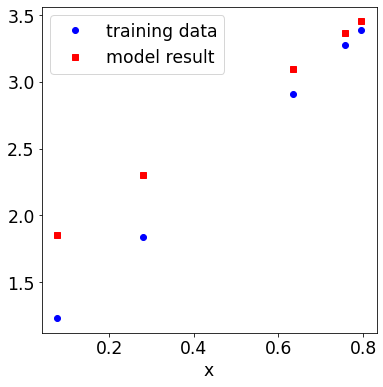

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

#plot the data points. Strip the "1" colum,nt from the features array
ax.plot(x[:,1],y, "bo", label="training data")

#plot the model result
y_model = np.sum(theta_model*x, axis=1, keepdims=True)
ax.plot(x[:,1],y_model, "rs", label="model result")

ax.set_xlabel("x")
ax.set_ylabel("")
ax.legend();

## Model performance on test data

* we investigate how the model works for data not used for training - the `test` dataset. The performance estimate has to be always made on a separate sample - the `test` dataset.

Create a test dataset, and make plot of the model result and the test data points.

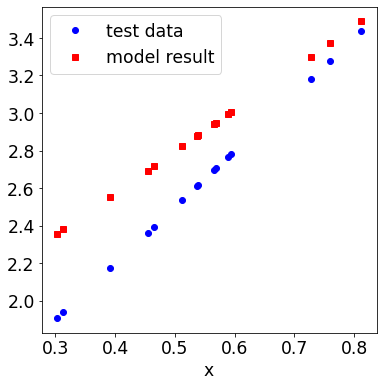

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))

#create the test dataset
nPoints = 15
x_test = np.random.default_rng().uniform(minX, maxX, nPoints)
x_test = np.reshape(x_test, (-1,1))
ones = np.ones(x_test.shape[0])
x_test = np.column_stack((ones, x_test))
y_test = np.sum(theta*x_test, axis=1)

#plot the data points
ax.plot(x_test[:,1],y_test, "bo", label="test data")

#plot the model result
y_model = np.sum(theta_model*x_test, axis=1, keepdims=True)
ax.plot(x_test[:,1],y_model, "rs", label="model result")

ax.set_xlabel("x")
ax.set_ylabel("")
ax.legend();

## Improve the model performance - run a longer training.

Our task is a very simple, but the model does not work very well - this is because we have made not enough model parameter update iterations.

**Please:**

* run the training for increasing number of iterations - until you will be satisfied with the result.

## Run the training on noisy data

So far the model performance was the same on training and test data. This was due to the fact there were no statistical fluctuations between the two datasets, and also the model is very simple, and can not adapt to much to data.

Now we will use a noisy dataset for training to see the effect of fluctuations.

### Generate data with Gaussian noise added to the pure formula:

$$
\huge{
y_{with~noise} = y + \epsilon \\
= Normal(\mu=y, \sigma=1)
}
$$

In [13]:
%%time

nPoints = 5
x = np.random.default_rng().uniform(minX, maxX, nPoints)

ones = np.ones(x.shape[0])
x = np.column_stack((ones, x))
y = np.sum(theta*x, axis=1).reshape((-1,1))

#define the gaussian smearing parameters
mu = y
sigma = 1.0

#generate the data 
y_with_noise = np.random.default_rng().normal(mu, sigma)

print(colored("Shape of the Y array:","blue"),y_with_noise.shape)
print(colored("First few Y values with noise:\n","blue"), y_with_noise[:10])

Shape of the Y array: (5, 1)
First few Y values with noise:
 [[4.9787032 ]
 [3.3478305 ]
 [1.54352049]
 [2.51140664]
 [4.61491843]]
CPU times: user 879 µs, sys: 803 µs, total: 1.68 ms
Wall time: 525 µs


### Make a control plot of noise data

Plot a histogram of `Y_noise - Y`. Check if it looks as expected.

**Please**

* generate more points if the histogram does not allow to judge the data quality
* go back to 5 data points for further exercises

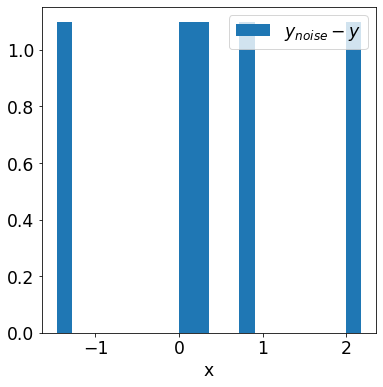

In [14]:
#control the size of the plot
fig, ax = plt.subplots(figsize=(6, 6))

# plot a histogram of fidderence between noisy and clean values
ax.hist(y_with_noise-y, bins=20, density=True, label=r"$y_{noise} - y$");
ax.set_xlabel("x")
ax.set_ylabel("")
ax.legend();

Run the training loop on the noisy data.

What is the minimal value of the MSE on the noisy data?

In [15]:
%%time

theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)

y_model = np.sum(theta_model*x, axis=1, keepdims=True)
loss = np.mean((y_model - y_with_noise)**2)
print(colored("Theta value before training:","blue"),theta_model)
print(colored("Loss function with initial parameters:","blue"), loss)

alpha = 0.1
nEpochs = 10
for iEpoch in range(nEpochs):
    x_batch = x
    y_batch = y_with_noise
    theta_model = batch_gradient_descent(x_batch, y_batch, theta_model, alpha)
    
    y_model = np.sum(theta_model*x, axis=1, keepdims=True)
    loss = np.mean((y_model - y_with_noise)**2)
    #print(colored("Epoch:","blue"), iEpoch, colored("loss:","blue"),loss)
    
print(colored("Theta value after training:","blue"),theta_model)
print(colored("Loss function with final parameters:","blue"), loss)

Theta value before training: [1.18947394 2.16380093]
Loss function with initial parameters: 2.0043922644265137
Theta value after training: [1.5967007  2.46136878]
Loss function with final parameters: 1.440215370560028
CPU times: user 613 µs, sys: 536 µs, total: 1.15 ms
Wall time: 1.01 ms


* plot the model result on the training, noisy data
* plot the model result on the test, clean data

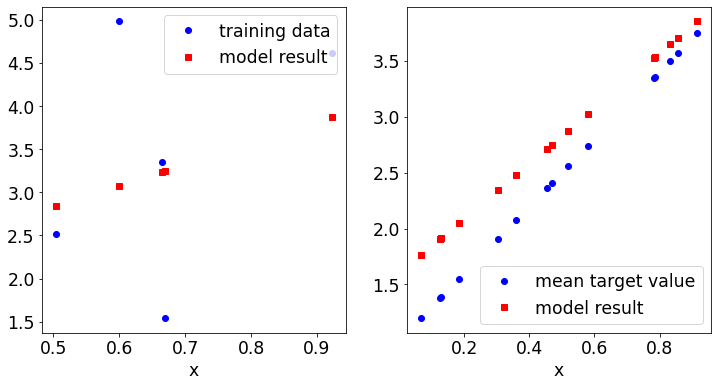

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

#plot the data points
ax[0].plot(x[:,1],y_with_noise, "bo", label="training data")

#plot the model result
y_model = np.sum(theta_model*x, axis=1, keepdims=True)
ax[0].plot(x[:,1],y_model, "rs", label="model result")

ax[0].set_xlabel("x")
ax[0].set_ylabel("")
ax[0].legend();

#create the test dataset
nPoints = 15
x_test = np.random.default_rng().uniform(minX, maxX, nPoints)
x_test = np.reshape(x_test, (-1,1))
ones = np.ones(x_test.shape[0])
x_test = np.column_stack((ones, x_test))
y_test = np.sum(theta*x_test, axis=1)

#plot the data points. Y of the test data correspond to mean Y of the noisy data.
ax[1].plot(x_test[:,1],y_test, "bo", label="mean target value")

#plot the model result
y_model = np.sum(theta_model*x_test, axis=1, keepdims=True)
ax[1].plot(x_test[:,1],y_model, "rs", label="model result")

ax[1].set_xlabel("x")
ax[1].set_ylabel("")
ax[1].legend();

## More data. 

to get better traiing results we need more data. More data will allow to average over statistical fluctiations.

**Please:**

* generate a larger training dataset - 10000 points
* run the training again
* remake the plots on training and test data

## Nonlinear models: neural networks

# An universal approximation theorem [Cybenko, 1989](https://link.springer.com/article/10.1007/BF02551274):

Let's define a ``neuron`` function on $R^{n} \rightarrow R$:
$$
\huge{
 f(\theta, x) = A(\sum_{i=1}^{N} \theta_{i} x_{i} + \beta)
}
$$

where `A` - activation function: any function of a single argument that fulfills requirements:

$$
\huge{
 \lim_{x\rightarrow -\infty} f(x) \rightarrow 0 \\
 \lim_{x\rightarrow +\infty} f(x) \rightarrow 1 \\
}
$$

Every continuous function on $R^{n} \rightarrow R$ can be approximated in basis of neural functions (=one layer of neurons).

$$
\huge{
y(x) \simeq \sum_{k} w_{k} f_{k}(\theta_{k}, x)
}
$$

We will not implement the gradients, and the training loop for the neural networks by hand. We will use pyTorch framework, which has all the components ready. This is the topic of the next session: a simple multi layer network.

## A task for the end of the session.

The statistical positional parameter of the Y population to which the model converges depends on the loss function. With the MSE loss function the model converges to mean target value. With mean absolute error (MAE):

$$
\huge{
L(f(X), Y) = \frac{1}{N} \sum_{X} |f(x) - y|
}
$$

the model converges to **median** of the Y distribution.

**Your task is to verify this statement.**

**Please:**

1) modify the `batch_gradient_descent()` function so it will use the MAE loss function

In [ ]:
def batch_gradient_descent(x_batch, y_batch, init_theta, alpha, verbose=False):
    #BEGIN_SOLUTION
    theta = init_theta 
    if verbose:
        print(colored("initial theta:\n","blue"), theta)
    #model response
    y_model = np.sum(theta*x_batch, axis=1, keepdims=True)
    if verbose:
        print(colored("model response:\n","blue"),y_model[:10])
    #calculate the update value
    delta = -alpha*np.sign(y_model - y_batch)*x_batch
    if verbose:
        print(colored("delta for each example:\n","blue"),delta[:10])
    #sum the update value over the examples provides
    delta = np.mean(delta, axis=0)
    if verbose:
        print(colored("delta averaged over examples:\n","blue"),delta)
    #apply the update to theta
    theta = theta + delta
    if verbose:
        print(colored("final theta:\n","blue"), theta)
    return theta 
    #END_SOLUTION

#test the function on a small batch
x_batch = x[:3]
y_batch = y[:3]
print(colored("X test:\n","blue"),x_batch)
print(colored("Y test:\n","blue"),y_batch)

#choose random initial parameters values
theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)

alpha = 1
minDelta = 1E-3
print(colored("\nTest on random parameters\n","blue"))
batch_gradient_descent(x_batch, y_batch, theta_model, alpha, True)


print(colored("\nTest on nominal parameters\n","blue"))
batch_gradient_descent(x_batch, y_batch, theta, alpha, True)

2) modify the noise distribution from symmetric Gaussian  to assymetric exponetial (so mean and median have different values):

$$
\huge{
y = \theta_{0} + \theta_{1} \cdot x \\
y_{with~noise} = Exp(\mu=y)
}
$$

and generate 15 000 examples.

In [ ]:
%%time

#generate the X sample
nPoints = 15000
x = np.random.default_rng().uniform(minX, maxX, nPoints)

# add the column of "1"
ones = np.ones(x.shape[0])
x = np.column_stack((ones, x))

#calculate the mean values of Y 
y = np.sum(theta*x, axis=1).reshape((-1,1))

#generate the data with noise
#BEGIN_SOLUTION
y_with_noise = np.random.default_rng().exponential(y)
#END_SOLUTION

print(colored("Trainig target shape:","blue"),y_with_noise.shape)

3) perform training. Use `alpha=0.1`, `nEpochs = 20000`

In [ ]:
#set the initial theta values to random numbers
theta_model = np.random.default_rng().uniform(min_theta, max_theta, nParams)

#calculate the MAE loss with initial values
y_model = np.sum(theta_model*x, axis=1, keepdims=True)
#BEGIN_SOLUTION
loss = np.mean(np.abs(y_model - y_with_noise))
#END_SOLUTION
print(colored("Theta value before training:","blue"),theta_model)
print(colored("Loss function with initial parameters:","blue"), loss)

#run the training loop
alpha = 0.1
nEpochs = 20000
#BEGIN_SOLUTION
for iEpoch in range(nEpochs):
    x_batch = x
    y_batch = y_with_noise
    theta_model = batch_gradient_descent(x_batch, y_batch, theta_model, alpha)
    y_model = np.sum(theta_model*x, axis=1, keepdims=True)
    loss = np.mean(np.abs(y_model - y_with_noise))
#END_SOLUTION    
    
#print the MAE loss with final parameters    
print(colored("Theta value after training:","blue"),theta_model)
print(colored("Loss function with final parameters:","blue"), loss)

4) make control plots:
* plot the model result on the training, noisy data
* plot the model result on the test data - clean, without noise. The Y values of the clean dataset correspond to an average value of the noisy Y
* plot clean data with Y values modified to show the median value: 
    
$$ 
\huge{
y_{median} = \ln(2) \cdot y_{mean}
}
$$

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

#plot the data points with noise
ax[0].plot(x[:,1],y_with_noise, "bo", label="training data")

#plot the model results on the training data
y_model = np.sum(theta_model*x, axis=1, keepdims=True)
ax[0].plot(x[:,1],y_model, "rs", label="model result")

ax[0].set_xlabel("x")
ax[0].set_ylabel("")
ax[0].legend();

#create the test dataset
nPoints = 15
x_test = np.random.default_rng().uniform(minX, maxX, nPoints)
x_test = np.reshape(x_test, (-1,1))
ones = np.ones(x_test.shape[0])
x_test = np.column_stack((ones, x_test))
y_test = np.sum(theta*x_test, axis=1)

#plot the data points for the test dataset. y values correspond to mean of the Y sample
ax[1].plot(x_test[:,1],y_test, "go", label="mean target value")

#plot the y values corresponding to median of the Y sample
#BEGIN_SOLUTION
ax[1].plot(x_test[:,1],np.log(2)*y_test, "bo", label="median target value")
#END_SOLUTION

#plot the model result on the test data
y_model = np.sum(theta_model*x_test, axis=1, keepdims=True)
ax[1].plot(x_test[:,1],y_model, "rs", label="model result")

ax[1].set_xlabel("x")
ax[1].set_ylabel("")
ax[1].legend();